In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('ph_dengue_cases2016-2020.csv')

In [2]:
# Filter the DataFrame to include only specific regions
selected_regions = ['BARMM', 'Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII'] 
filtered_df = df[df['Region'].isin(selected_regions)]
filtered_df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
540,January,2016,Region IX,596,2
541,February,2016,Region IX,432,2
542,March,2016,Region IX,414,1
543,April,2016,Region IX,286,1
544,May,2016,Region IX,451,3
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


DATA CLEANING

In [3]:
print(filtered_df.duplicated().sum())

print(filtered_df.isnull().sum())

0
Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64


Q1: Are there specific months where dengue cases in Mindanao are constantly higher?

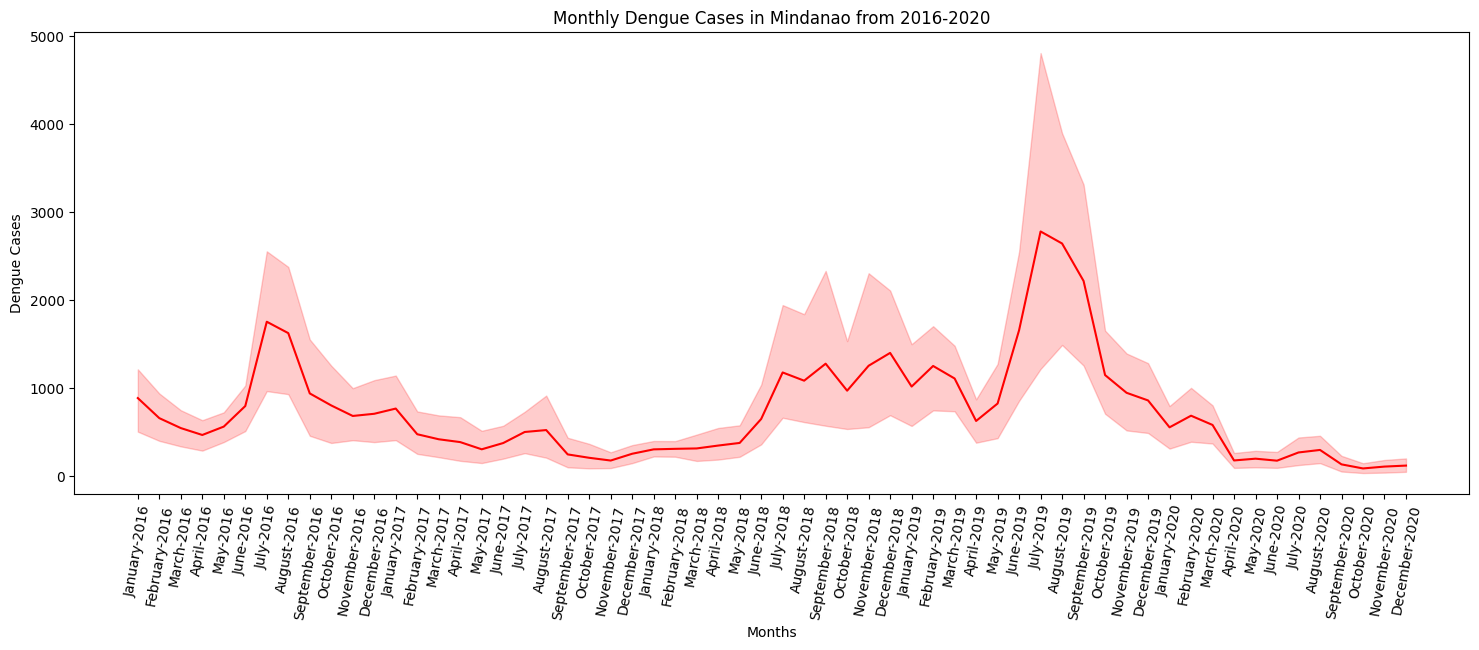

In [4]:
# Convert 'Month' and 'Year' columns to datetime format
index = 0
months = []
years = [i for i in filtered_df['Year']]
for i in filtered_df['Month']:
    months.append(str(i) +'-'+ str(years[index]))
    index += 1
plt.figure(figsize=(18,6))
sns.lineplot(x=months,y=[i for i in filtered_df['Dengue_Cases']],color='red')
plt.title('Monthly Dengue Cases in Mindanao from 2016-2020')
plt.xlabel('Months')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=80)
plt.show()

Q2: What is the average number of dengue cases per month in Mindanao?

C:\Users\New User\AppData\Local\Temp\ipykernel_7960\3027056322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=month_order, ordered=True)
C:\Users\New User\AppData\Local\Temp\ipykernel_7960\3027056322.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_mean_cases = filtered_df.groupby('Month')['Dengue_Cases'].mean()
C:\Users\New User\AppData\Local\Temp\ipykernel_7960\3027056322.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

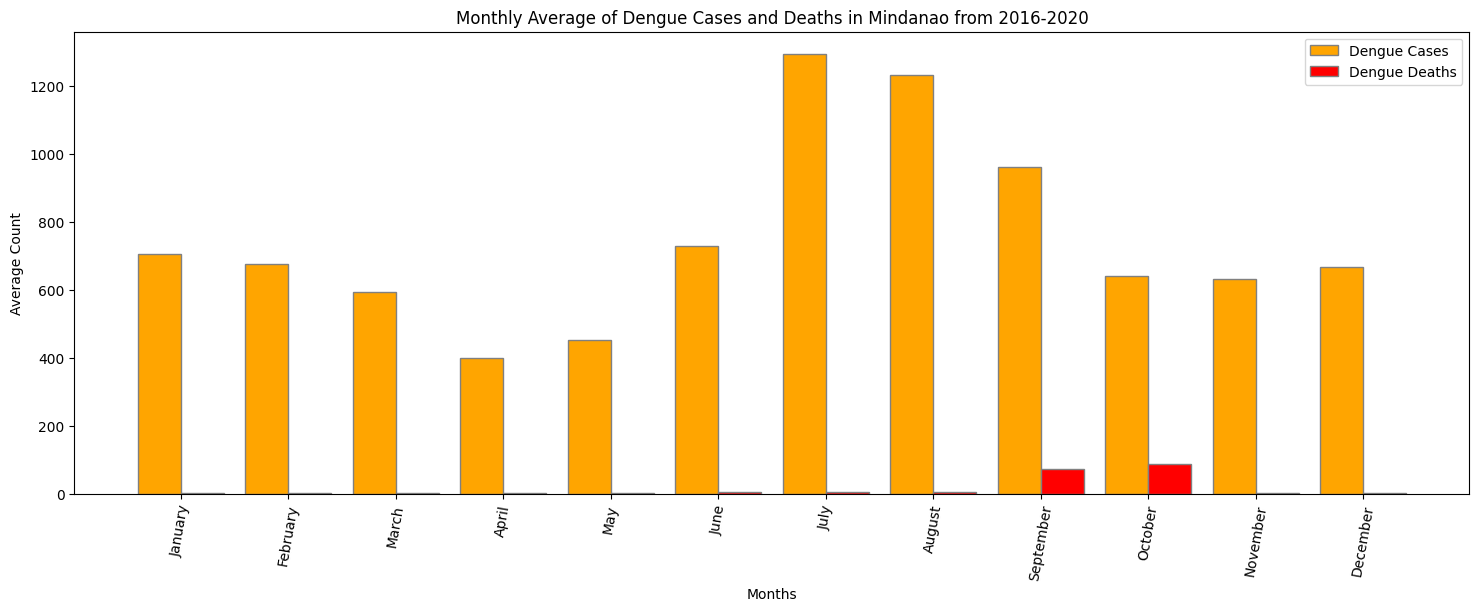

In [5]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' column to categorical data type with the specified order
filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=month_order, ordered=True)

# Grouping data by month and calculating the mean of Dengue cases for each month
monthly_mean_cases = filtered_df.groupby('Month')['Dengue_Cases'].mean()
monthly_mean_deaths = filtered_df.groupby('Month')['Dengue_Deaths'].mean()

# Plotting the bar charts
plt.figure(figsize=(18,6))
bar_width = 0.4
months = monthly_mean_cases.index.astype(str)

# Positions for the bars
r1 = range(len(months))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, monthly_mean_cases, color='orange', width=bar_width, edgecolor='grey', label='Dengue Cases')
plt.bar(r2, monthly_mean_deaths, color='red', width=bar_width, edgecolor='grey', label='Dengue Deaths')

# Adding titles and labels
plt.title('Monthly Average of Dengue Cases and Deaths in Mindanao from 2016-2020')
plt.xlabel('Months')
plt.ylabel('Average Count')
plt.xticks([r + bar_width / 2 for r in range(len(months))], months, rotation=80)
plt.legend()

plt.show()

Q3: Which region has the highest number of dengue cases in 2016-2020?

C:\Users\Aaron\AppData\Local\Temp\ipykernel_15448\454058227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Region'] = pd.Categorical(filtered_df['Region'], categories=regions, ordered=True)
C:\Users\Aaron\AppData\Local\Temp\ipykernel_15448\454058227.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_cases = filtered_df.groupby('Region')['Dengue_Cases'].sum()


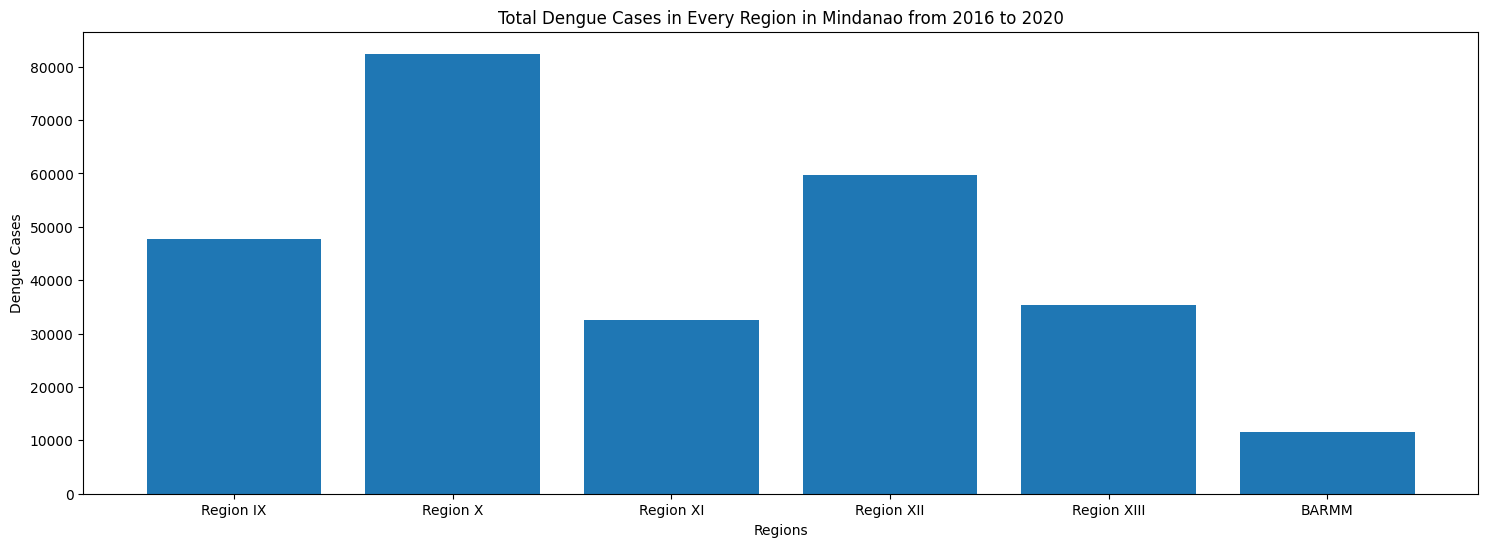

In [3]:
regions = ['Region IX', 'Region X', 'Region XI', 'Region XII', 'Region XIII', 'BARMM'] 
filtered_df['Region'] = pd.Categorical(filtered_df['Region'], categories=regions, ordered=True)
region_cases = filtered_df.groupby('Region')['Dengue_Cases'].sum()
region_cases

plt.figure(figsize=(18,6))
plt.bar(x=regions, height=region_cases)
plt.title('Total Dengue Cases in Every Region in Mindanao from 2016 to 2020')
plt.xlabel('Regions')
plt.ylabel('Dengue Cases')
plt.show()